<a href="https://colab.research.google.com/github/Papa-Panda/paper_reading/blob/main/Copy_of_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 多层感知机


In [ ]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt

# from d2l import torch as d2l

### ReLU函数
（Rectified linear unit，*ReLU*），
**$$\operatorname{ReLU}(x) = \max(x, 0).$$**


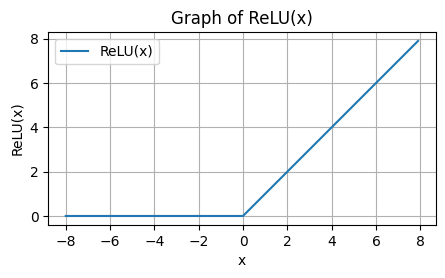

In [ ]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
# d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))
# Convert to NumPy arrays for plotting
x_np = x.detach().numpy()
y_np = y.detach().numpy()

# Plot the graph
plt.figure(figsize=(5, 2.5))
plt.plot(x_np, y_np, label='ReLU(x)')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Graph of ReLU(x)')
plt.legend()
plt.grid(True)
plt.show()


当输入为负时，ReLU函数的导数为0，而当输入为正时，ReLU函数的导数为1。


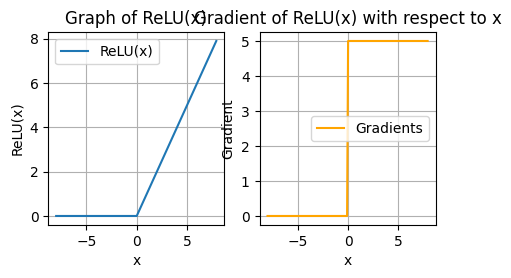

In [ ]:
y.backward(torch.ones_like(x), retain_graph=True)
# d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))
y.backward(torch.ones_like(x), retain_graph=True)

# Detach x and get the gradients of x
x_detached = x.detach().numpy()
gradients = x.grad.detach().numpy()

# Plot the graph
plt.figure(figsize=(5, 2.5))

# Plot the detached x values
plt.subplot(1, 2, 1)
plt.plot(x_detached, y.detach().numpy(), label='ReLU(x)')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Graph of ReLU(x)')
plt.legend()
plt.grid(True)

# Plot the gradients of x
plt.subplot(1, 2, 2)
plt.plot(x_detached, gradients, label='Gradients', color='orange')
plt.xlabel('x')
plt.ylabel('Gradient')
plt.title('Gradient of ReLU(x) with respect to x')
plt.legend()
plt.grid(True)

注意，ReLU函数有许多变体，包括*参数化ReLU*（Parameterized ReLU，*pReLU*）

$$\operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x).$$

### sigmoid函数

**$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$**

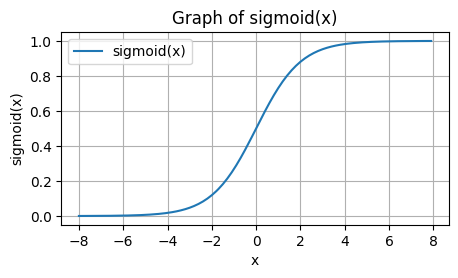

In [ ]:
y = torch.sigmoid(x)
x_np = x.detach().numpy()
y_np = y.detach().numpy()

# Plot the graph
plt.figure(figsize=(5, 2.5))
plt.plot(x_np, y_np, label='sigmoid(x)')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Graph of sigmoid(x)')
plt.legend()
plt.grid(True)
plt.show()

# d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

sigmoid函数的导数为下面的公式：

$$\frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

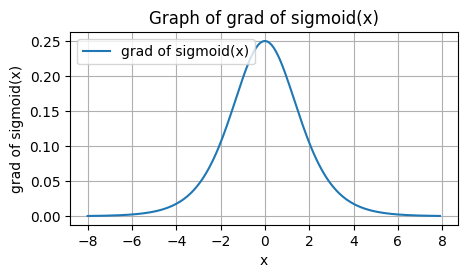

In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
# d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

x_np = x.detach().numpy()
y_np = x.grad.numpy()

# Plot the graph
plt.figure(figsize=(5, 2.5))
plt.plot(x_np, y_np, label='grad of sigmoid(x)')
plt.xlabel('x')
plt.ylabel('grad of sigmoid(x)')
plt.title('Graph of grad of sigmoid(x)')
plt.legend()
plt.grid(True)
plt.show()


### tanh函数


**$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$**


In [ ]:
y = torch.tanh(x)
# d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

tanh函数的导数是：

$$\frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

tanh函数的导数图像如下所示。
当输入接近0时，tanh函数的导数接近最大值1。
与我们在sigmoid函数图像中看到的类似，
输入在任一方向上越远离0点，导数越接近0。


In [ ]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
# d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

[Discussions](https://discuss.d2l.ai/t/1796)
